# WeatherPy
----

#### Observations
* 1. There is a strong correlation between latitude and max temp for both hemispheres. Northern hemisphere gets colder the further north you go from he equator while the southern hemisphere gets colder the further south you go from the equator.
* 2. The vast majority of locations have a humidity percentage of over 50%. This has little to no reliance on latitude. 
* 3. The vast majority of locations have a wind speed of 15mph or less. This also has little to no reliance on latitude.
* 4. Cloudiness is completely unaffected by the latitude of a location. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #size should be 1500 in this and below
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If statement that determines if the city is unique, then adds it to a our cities list (only if unique)
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#empty lists to store info
usedLats=[]
usedLngs=[]
maxTemp=[]
humidity=[]
cloudiness=[]
windSpeed=[]
country=[]
date=[]
usedCities=[]

# Set up API call information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print("Beginning Data Retrieval")
print("-------------------------------")

#iterate through each city
for city in cities:
    
    #send the request
    response = requests.get(query_url + city).json()
    
    #track record number
    recordNum=cities.index(city)+1  
    
    try: 
        #append info to corresponding list above
        usedLats.append(response['coord']['lat'])
        usedLngs.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])     
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        usedCities.append(city)
        
        #print to make it known it was successful
        print(f"Processing Record {recordNum} of Set 1 | {city}")
        
    except:
        #if unable to retrieve some info, show skipping message
        print(f"The city, {city}, was not found. Skipping...")    
        


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | atuona
The city, taolanaro, was not found. Skipping...
Processing Record 4 of Set 1 | kabare
Processing Record 5 of Set 1 | pemangkat
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | svetlogorsk
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | gairo
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | bolobo
Processing Record 13 of Set 1 | san
The city, amderma, was not found. Skipping...
Processing Record 15 of Set 1 | samarai
Processing Record 16 of Set 1 | vysokogornyy
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | rabak
Processing Record 21 of Set 1 | visnes
Processing Record 22 of Set 1 | kalabo
Processing Record 23 of Set 1 | mataura
Processin

Processing Record 195 of Set 1 | ust-ishim
Processing Record 196 of Set 1 | adrar
Processing Record 197 of Set 1 | ariquemes
The city, doctor pedro p. pena, was not found. Skipping...
Processing Record 199 of Set 1 | vanimo
Processing Record 200 of Set 1 | pangoa
Processing Record 201 of Set 1 | viedma
Processing Record 202 of Set 1 | bata
The city, fevralsk, was not found. Skipping...
Processing Record 204 of Set 1 | barrow
Processing Record 205 of Set 1 | los llanos de aridane
Processing Record 206 of Set 1 | grand gaube
Processing Record 207 of Set 1 | tasiilaq
Processing Record 208 of Set 1 | santa cruz
Processing Record 209 of Set 1 | souillac
Processing Record 210 of Set 1 | havre-saint-pierre
Processing Record 211 of Set 1 | katsuura
Processing Record 212 of Set 1 | moron
Processing Record 213 of Set 1 | zhuhai
Processing Record 214 of Set 1 | beloha
Processing Record 215 of Set 1 | touros
Processing Record 216 of Set 1 | shitanjing
Processing Record 217 of Set 1 | iqaluit
Proce

Processing Record 390 of Set 1 | sarakhs
Processing Record 391 of Set 1 | jurmala
Processing Record 392 of Set 1 | constitucion
Processing Record 393 of Set 1 | talara
Processing Record 394 of Set 1 | hami
Processing Record 395 of Set 1 | mocajuba
Processing Record 396 of Set 1 | bulungu
Processing Record 397 of Set 1 | asau
Processing Record 398 of Set 1 | tobol
Processing Record 399 of Set 1 | zapolyarnyy
Processing Record 400 of Set 1 | port-gentil
The city, karakendzha, was not found. Skipping...
Processing Record 402 of Set 1 | kavieng
Processing Record 403 of Set 1 | shelburne
Processing Record 404 of Set 1 | barisal
Processing Record 405 of Set 1 | menongue
Processing Record 406 of Set 1 | kaupanger
Processing Record 407 of Set 1 | batagay
The city, saleaula, was not found. Skipping...
Processing Record 409 of Set 1 | magistralnyy
Processing Record 410 of Set 1 | khakhea
Processing Record 411 of Set 1 | egvekinot
Processing Record 412 of Set 1 | marsh harbour
Processing Record 4

Processing Record 582 of Set 1 | bathurst
Processing Record 583 of Set 1 | moindou
Processing Record 584 of Set 1 | ternate
Processing Record 585 of Set 1 | chichli
Processing Record 586 of Set 1 | cap malheureux
Processing Record 587 of Set 1 | honiton
Processing Record 588 of Set 1 | cabra
Processing Record 589 of Set 1 | kindu
The city, tunduru, was not found. Skipping...
Processing Record 591 of Set 1 | santa maria
Processing Record 592 of Set 1 | jalu
Processing Record 593 of Set 1 | kavaratti
Processing Record 594 of Set 1 | borovskoy
Processing Record 595 of Set 1 | saraland
Processing Record 596 of Set 1 | gunjur
Processing Record 597 of Set 1 | aykhal
Processing Record 598 of Set 1 | burnie
The city, nizhneyansk, was not found. Skipping...
Processing Record 600 of Set 1 | tongliao
Processing Record 601 of Set 1 | peringat
Processing Record 602 of Set 1 | codrington
Processing Record 603 of Set 1 | fort nelson
Processing Record 604 of Set 1 | acapulco
Processing Record 605 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv
* Display the DataFrame

In [4]:
#create data frame
weatherPy=pd.DataFrame({"City":usedCities,"Lat":usedLats,"Lng":usedLngs,"Max Temp":maxTemp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,"Country":country,"Date":date})

#export to a CSV file
weatherPy.to_csv("Weather_Data.csv", encoding="utf-8", index=False)

#display first 5 in data frame
weatherPy.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,71.33,73,17,5.64,PF,1627260013
1,atuona,-9.8000,-139.0333,78.30,72,4,23.26,PF,1627260013
2,kabare,-2.4683,28.8242,58.46,86,93,1.95,CD,1627260014
3,pemangkat,1.1667,108.9667,81.37,82,18,6.80,ID,1627259871
4,ribeira grande,38.5167,-28.7000,70.45,82,7,14.85,PT,1627260014


In [5]:
#show all stats available for data frame
weatherPy.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.375932,21.505907,68.991484,71.118375,51.636042,7.757438,1.627260e+09
std,33.612540,90.878644,13.503019,19.346723,40.615639,5.594916,9.978769e+01
min,-54.800000,-179.166700,31.190000,7.000000,0.000000,0.000000,1.627259e+09
25%,-9.040375,-58.715150,58.540000,60.000000,6.000000,3.440000,1.627260e+09
50%,21.904250,25.960200,71.170000,75.000000,55.000000,6.645000,1.627260e+09
75%,48.011825,103.029800,79.210000,86.750000,96.000000,10.360000,1.627260e+09
max,78.218600,178.416700,103.910000,100.000000,100.000000,33.870000,1.627260e+09


## Inspect the data and remove the cities where the humidity > 100%.
----


In [6]:
#upload from the CSV file
weatherPyCSV=pd.read_csv('Weather_Data.csv')

#sort value by humidity %
weatherPyCSV=weatherPyCSV.sort_values("Humidity", ascending=False).reset_index()
weatherPyCSV.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,183,bata,1.8639,9.7658,73.26,100,40,0.00,GQ,1627260066
1,260,maceio,-9.6658,-35.7353,72.84,100,75,3.44,BR,1627259993
2,470,NaN,18.8333,100.6667,73.42,100,75,2.30,TH,1627260147
3,108,clyde river,70.4692,-68.5914,35.83,100,90,3.44,CA,1627260043
4,111,grindavik,63.8424,-22.4338,48.15,100,90,19.57,IS,1627260009


In [7]:
#  Get the indices of cities that have humidity over 100%.
HumidityIndices=weatherPyCSV['City'].where(weatherPyCSV['Humidity'] > 100).to_frame(name='Humidity > 100')

indexList=HumidityIndices.index[HumidityIndices['Humidity > 100'].notnull()].tolist()


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(indexList)!=0:
    print(f"There are columns to drop: {indexList}")
    for x in indexList:
        cleanWeatherPy=WeatherPyCSV.drop(indexList , inplace=False)
else:
    print("There are no columns to drop")

There are no columns to drop


In [9]:
#display cleaned data
weatherPyCSV.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,183,bata,1.8639,9.7658,73.26,100,40,0.00,GQ,1627260066
1,260,maceio,-9.6658,-35.7353,72.84,100,75,3.44,BR,1627259993
2,470,NaN,18.8333,100.6667,73.42,100,75,2.30,TH,1627260147
3,108,clyde river,70.4692,-68.5914,35.83,100,90,3.44,CA,1627260043
4,111,grindavik,63.8424,-22.4338,48.15,100,90,19.57,IS,1627260009


# Plotting the Data

## Latitude vs. Temperature Plot

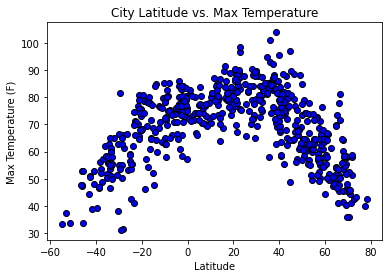

In [10]:
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig('../WebDesign/Resources/assets/images/latVtemp.png', dpi=150, bbox_inches='tight')

#### The above scatter plot shows latitude in relation to the location's Max temperature. We can see that the northern hemisphere
#### (to the right of 0 on the latitude line) gets colder the futher north you get. Conversely, the southern hemisphere gets
#### colder the further south you get from the equator.

## Latitude vs. Humidity Plot

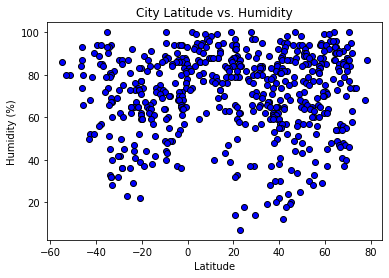

In [11]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig('../WebDesign/Resources/assets/images/latVhumidity.png', dpi=150, bbox_inches='tight')

#### The above scatter plot shows latitude in relation to the location's humidity. There's little correlation, but there does seem
#### to be many (visually more than 3/4of the data set) that have humidity higher than 50%. These locations are spread fairly evenly
#### between the northern and southern hemispheres.

## Latitude vs. Cloudiness Plot

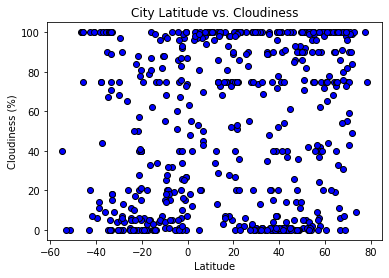

In [12]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig('../WebDesign/Resources/assets/images/latVcloudiness.png', dpi=150, bbox_inches='tight')

#### The above scatter plot show latitude in relation to cloudiness. There seems to be absolutely no relation between a location
#### and the amount of cloudiness it received.

## Latitude vs. Wind Speed Plot

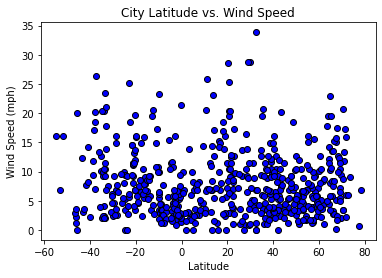

In [13]:
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig('../WebDesign/Resources/assets/images/latVwind.png', dpi=150, bbox_inches='tight')

#### The above scatter plot shows latitude in relation to the locations wind speed (mph). There doesn't seem to be much relation
#### for wind speed compared to location, however, visually it seems that more than 3/4 of the locations experience wind speeds of
#### 15mph or less.

# Linear Regression

In [14]:
northernDF=weatherPyCSV[weatherPyCSV["Lat"]>=0]
southernDF=weatherPyCSV[weatherPyCSV["Lat"]<=0]

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6435352640256061


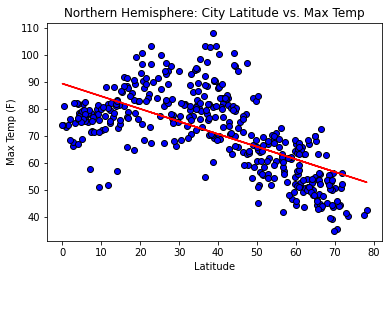

<Figure size 432x288 with 0 Axes>

In [29]:
plt.title("Northern Hemisphere: City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.show()
plt.savefig('NHlatVtemp.png', dpi=150, bbox_inches='tight')

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7040997595627262


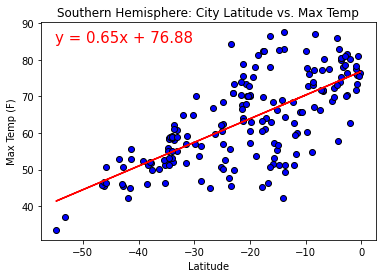

<Figure size 432x288 with 0 Axes>

In [30]:
plt.title("Southern Hemisphere: City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.show()
plt.savefig('SHlatVtemp.png', dpi=150, bbox_inches='tight')

#### The above two scatter plots show the norther and southern hemispheres, respectively, compared to the max temp in each location.
#### There is a relatively strong relation for each hemisphere and it's max temps, where northern hemisphere locations get colder
#### further north, while the southern hemisphere has colder temps further south.

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0029504885477440114


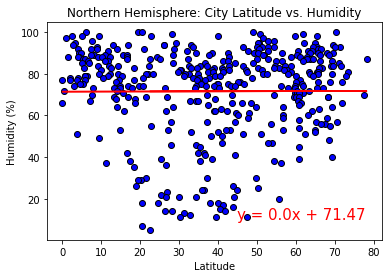

<Figure size 432x288 with 0 Axes>

In [31]:
plt.title("Northern Hemisphere: City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Humidity"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()
plt.savefig('NHlatVhumidity.png', dpi=150, bbox_inches='tight')

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.02965314919222938


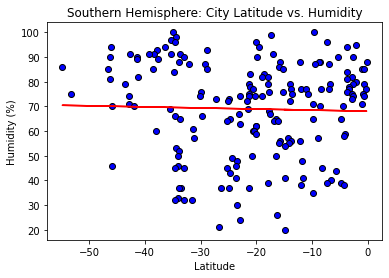

<Figure size 432x288 with 0 Axes>

In [32]:
plt.title("Southern Hemisphere: City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Humidity"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.show()
plt.savefig('SHlatVhumidity.png', dpi=150, bbox_inches='tight')

#### The above two scatter plots show latitude vs humidity for both the northern and southern hemispheres. Neither hemisphere has
#### a strong relation between the two, however, the southern hemisphere has  the vast majority of cities with humidity over 50%
#### while the norther hemisphere has a lot more occurences of cities with humidity below 50% (however, the vast majority of  
#### cities still have humidity over 50%).
 

##  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.029799089576623954


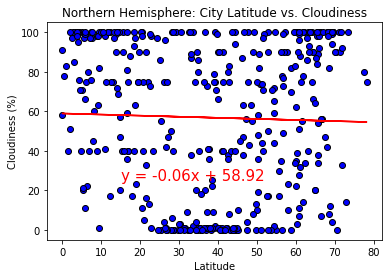

<Figure size 432x288 with 0 Axes>

In [33]:
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Cloudiness"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(15,25),fontsize=15,color="red")
plt.show()
plt.savefig('NHlatVcloudiness.png', dpi=150, bbox_inches='tight')

##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.18668471475774995


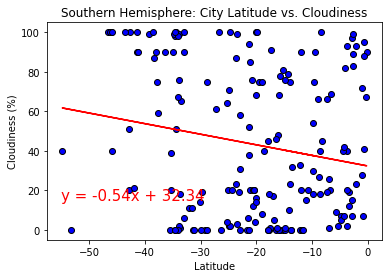

<Figure size 432x288 with 0 Axes>

In [34]:
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Cloudiness"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.show()
plt.savefig('SHlatVcloudiness.png', dpi=150, bbox_inches='tight')

#### The above two scatter plots show the relation between latitude and cloudiness for both the northern and southern hemispheres.
#### There is little to no relationship between these two variables. The number of places with cloudiness greater than 50% seems 
#### to be balanced with the number of places with cloudiness less than 50%, and both are spread evenly over all latitudes.

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12089706173953225


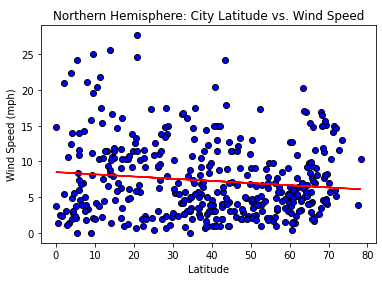

<Figure size 432x288 with 0 Axes>

In [35]:
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Wind Speed"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(48,30),fontsize=15,color="red")
plt.show()
plt.savefig('NHlatVwind.png', dpi=150, bbox_inches='tight')

##  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20425183257510382


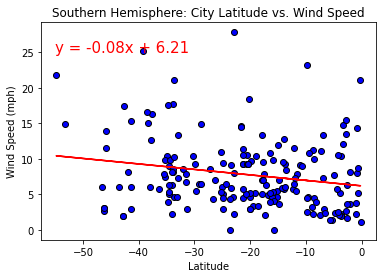

<Figure size 432x288 with 0 Axes>

In [36]:
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Wind Speed"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()
plt.savefig('SHlatVwind.png', dpi=150, bbox_inches='tight')

#### The above two scatter plots show the relationship between latitude and wind speed for the nothern and southern hemispheres.
#### There doesn't seem to be a huge relation between the two for the northern or southern hemispheres, however but have a majority
#### of locations with wind speed of 15mph or less. 